In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray
%matplotlib inline

# Load GWCFD data

## Load the veritical profiles

In [2]:
D    = 27.0
x    = '8'
#dsLocations = [-2.5, 1, 2, 3, 4, 5, 6, 7, 8]
#dsLocations = [-2.5]
spanLocations = np.linspace(-55.0, 55.0, 111)

ablType = 'neutral'
simNomenclature = '5b'

In [3]:
## The coordinates

In [4]:
nx   = 1
ny   = len(spanLocations)
nz   = 100
nt   = 1

In [5]:
##The Velocities

In [6]:
U = np.zeros((nt,nx,ny,nz))
V = np.zeros((nt,nx,ny,nz))
W = np.zeros((nt,nx,ny,nz))

In [7]:
x_1d = np.zeros((nx)) + float(x)*D
y_1d = np.linspace(-55.0, 55.0, 111)
#z_1d = vertLine['z']
t_1d = [2000]
print (x_1d)
#print (y_1d)
#print (z_1d)
print (t_1d)

[216.]
[2000]


In [8]:
for spanLocCount in range(len(spanLocations)):
    spanLoc = spanLocations[spanLocCount]
    #print ('spanLoc: ',spanLoc)
    fileName = 'plane_%sD_span_%03d'%(x,spanLocCount)
    #print ('fileName: ', fileName)
    fileToRead = '../../post_pro/turbine_'+ ablType+ simNomenclature+ '/slices/'+fileName+'_U.xy'
    #print ("Reading file: %s"%fileToRead)
    vertLine = pd.read_csv(fileToRead,
                sep='\s+', skiprows=0, names=['z', 'U', 'V', 'W'])
    #print(len(vertLine))
    z_1d = vertLine['z']
    #print(z_1d[32])
    
    Ux =  vertLine['V'] # Note that axial direction is along +y
    Uy = -vertLine['U'] # spanwise is along -x
    Uz =  vertLine['W']
    #print (Ux)
    #print (Uy)
    #print (Uz)
    
    U[0][0][spanLocCount] = Ux
    V[0][0][spanLocCount] = Uy
    W[0][0][spanLocCount] = Uz
       

In [9]:
print("Shape of U is {0}".format(U.shape))
print("Shape of V is {0}".format(V.shape))
print("Shape of W is {0}".format(W.shape))

Shape of U is (1, 1, 111, 100)
Shape of V is (1, 1, 111, 100)
Shape of W is (1, 1, 111, 100)


# Use xarray to create DataArrays, then Dataset

### The velocities

In [10]:
U = xarray.DataArray(data=U, 
                     dims=("t","x","y","z"), 
                     coords={"t":t_1d,"x":x_1d,"y":y_1d,"z":z_1d}, 
                     name="U",
                     attrs={"long_name":"streamwise wind component","units":"m/s"})

In [11]:
V = xarray.DataArray(data=V, 
                     dims=("t","x","y","z"), 
                     coords={"t":t_1d,"x":x_1d,"y":y_1d,"z":z_1d}, 
                     name="V",
                     attrs={"long_name":"cross-stream wind component","units":"m/s"})

In [12]:
W = xarray.DataArray(data=W, 
                     dims=("t","x","y","z"), 
                     coords={"t":t_1d,"x":x_1d,"y":y_1d,"z":z_1d}, 
                     name="W",
                     attrs={"long_name":"vertical wind component","units":"m/s"})

In [13]:
dataset = xarray.Dataset(data_vars={"U":U,"V":V,"W":W})

In [14]:
print(dataset)

<xarray.Dataset>
Dimensions:  (t: 1, x: 1, y: 111, z: 100)
Coordinates:
  * t        (t) int64 2000
  * x        (x) float64 216.0
  * y        (y) float64 -55.0 -54.0 -53.0 -52.0 -51.0 ... 52.0 53.0 54.0 55.0
  * z        (z) float64 0.0 1.01 2.02 3.03 4.04 ... 96.97 97.98 98.99 100.0
Data variables:
    U        (t, x, y, z) float64 6.233e-13 2.865 5.3 5.753 ... 10.19 10.2 10.22
    V        (t, x, y, z) float64 -3.816e-29 -0.0708 ... -0.09028 -0.08987
    W        (t, x, y, z) float64 0.0 -0.0006285 ... 0.0003202 0.0003888


# See what it looks like

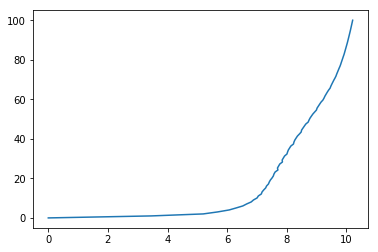

In [15]:
plt.plot(U.loc[t_1d[0],x_1d[0],y_1d[int(ny/2)],:], z_1d)

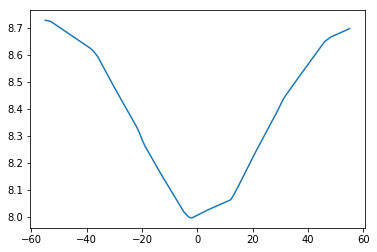

In [16]:
plt.plot( y_1d, U.loc[t_1d[0],x_1d[0],:,z_1d[32]])

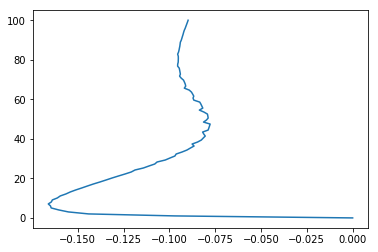

In [17]:
plt.plot(V.loc[t_1d[0],x_1d[0],y_1d[int(ny/2)],:], z_1d)

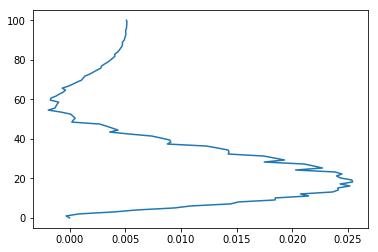

In [18]:
plt.plot(W.loc[t_1d[0],x_1d[0],y_1d[int(ny/2)],:], z_1d)

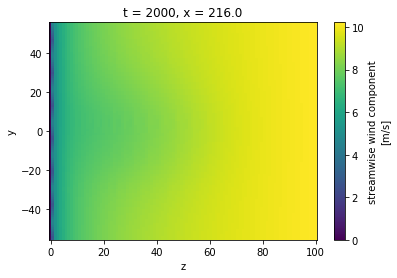

In [19]:
xarray.plot.pcolormesh(U.loc[t_1d[0],x_1d[0],:,:])

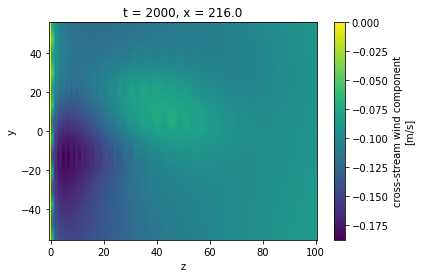

In [20]:
xarray.plot.pcolormesh(V.loc[t_1d[0],x_1d[0],:,:])

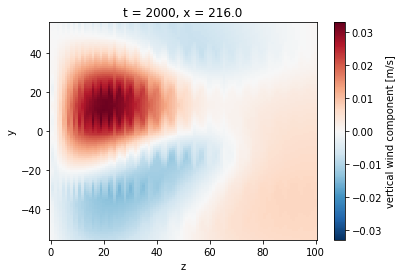

In [21]:
xarray.plot.pcolormesh(W.loc[t_1d[0],x_1d[0],:,:])

# Save as NetCDF

In [22]:
netcdf_path = os.path.join('../files_submitted','Phase2',ablType,'slices')
if not os.path.exists(netcdf_path):
        os.makedirs(netcdf_path)
dataset.to_netcdf(path=os.path.join(netcdf_path,'ENVISION_OXLEY_RANS_20190304_uvw_'+x+'D.nc'),mode='w')